In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
# pd.set_option('plotting.backend', 'pandas_bokeh')
# warnings.filterwarnings('ignore')

In [2]:
#global cases

dfglobal = pd.read_csv("/Users/anaantonello/Desktop/Jupter NoteBooks/data/IHME-GBD_ADHD.csv")
dfglobal.head(1)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),1,Global,1,Male,9,20-24 years,567,Depressive disorders,1,Number,1990,1.348516e+06,2.039745e+06,853642.652621


In [3]:
# cases by WHO region

dfregions = pd.read_csv("/Users/anaantonello/Desktop/Jupter NoteBooks/data/IHME-GBD_2019_DATA-a715bc27-1.csv")
dfregions.head(2)

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),Region of the Americas,Male,10-19 years,Anxiety disorders,Percent,2019,0.033054,0.046684,0.022703
1,DALYs (Disability-Adjusted Life Years),Region of the Americas,Female,10-19 years,Anxiety disorders,Percent,2019,0.060317,0.083089,0.041538


#### Editing global cases
Drop unnecessary columns
Rename columns


In [4]:
# Removing unnecessary columns and saving in a new variable (adhd)

dfglobal_use = dfglobal.drop(['measure_id', 'measure_name', 'location_id', 'sex_id', 'age_id',
                       'cause_id', 'metric_id'],axis = 1)
dfglobal_use.head(5)

,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,Global,Male,20-24 years,Depressive disorders,Number,1990,1.348516e+06,2.039745e+06,8.536427e+05
1,Global,Female,20-24 years,Depressive disorders,Number,1990,2.233168e+06,3.348133e+06,1.417527e+06
2,Global,Male,20-24 years,Depressive disorders,Percent,1990,2.692636e-02,3.799595e-02,1.814054e-02
3,Global,Female,20-24 years,Depressive disorders,Percent,1990,4.772681e-02,6.567023e-02,3.224251e-02
4,Global,Male,20-24 years,Depressive disorders,Rate,1990,5.430803e+02,8.214551e+02,3.437827e+02


In [5]:
# Renameing columns

global_new_cols = {}

for col in dfglobal_use.columns:
    if '_' in col:
        parts = col.split('_')
        global_new_cols[col] = parts[0]

dfglobal_use.rename(columns = global_new_cols, inplace = True)

dfglobal_use.head()

,location,sex,age,cause,metric,year,val,upper,lower
0,Global,Male,20-24 years,Depressive disorders,Number,1990,1.348516e+06,2.039745e+06,8.536427e+05
1,Global,Female,20-24 years,Depressive disorders,Number,1990,2.233168e+06,3.348133e+06,1.417527e+06
2,Global,Male,20-24 years,Depressive disorders,Percent,1990,2.692636e-02,3.799595e-02,1.814054e-02
3,Global,Female,20-24 years,Depressive disorders,Percent,1990,4.772681e-02,6.567023e-02,3.224251e-02
4,Global,Male,20-24 years,Depressive disorders,Rate,1990,5.430803e+02,8.214551e+02,3.437827e+02


In [6]:
dfglobal_use.shape

(5400, 9)

In [7]:
dfglobal_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  5400 non-null   object 
 1   sex       5400 non-null   object 
 2   age       5400 non-null   object 
 3   cause     5400 non-null   object 
 4   metric    5400 non-null   object 
 5   year      5400 non-null   int64  
 6   val       5400 non-null   float64
 7   upper     5400 non-null   float64
 8   lower     5400 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 379.8+ KB


#### Editing Regional cases
Drop unnecessary columns
Now both df will fave the same number of columns and the related columns will have the same name

In [8]:
dfregions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   measure   360 non-null    object 
 1   location  360 non-null    object 
 2   sex       360 non-null    object 
 3   age       360 non-null    object 
 4   cause     360 non-null    object 
 5   metric    360 non-null    object 
 6   year      360 non-null    int64  
 7   val       360 non-null    float64
 8   upper     360 non-null    float64
 9   lower     360 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 28.3+ KB


In [9]:
dfregions.drop(['measure'], axis = 1, inplace = True)
dfregions.shape

(360, 9)

In [10]:
ages = []

for age in dfglobal_use['age']:
    if age not in ages: ages.append(age)
print(sorted(ages))

['0-9 years', '10-19 years', '20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years', '50-54 years', '55+ years']


### Concatenating both df

In [11]:
cases = pd.concat([dfglobal_use, dfregions], axis = 0, ignore_index = True)
cases.head()

,location,sex,age,cause,metric,year,val,upper,lower
0,Global,Male,20-24 years,Depressive disorders,Number,1990,1.348516e+06,2.039745e+06,8.536427e+05
1,Global,Female,20-24 years,Depressive disorders,Number,1990,2.233168e+06,3.348133e+06,1.417527e+06
2,Global,Male,20-24 years,Depressive disorders,Percent,1990,2.692636e-02,3.799595e-02,1.814054e-02
3,Global,Female,20-24 years,Depressive disorders,Percent,1990,4.772681e-02,6.567023e-02,3.224251e-02
4,Global,Male,20-24 years,Depressive disorders,Rate,1990,5.430803e+02,8.214551e+02,3.437827e+02


In [12]:
cases['age'] = cases['age'].str.split(' ').str.get(0)
cases.head(2)

,location,sex,age,cause,metric,year,val,upper,lower
0,Global,Male,20-24,Depressive disorders,Number,1990,1.348516e+06,2.039745e+06,8.536427e+05
1,Global,Female,20-24,Depressive disorders,Number,1990,2.233168e+06,3.348133e+06,1.417527e+06


In [13]:
cases['cause'].unique()

array(['Depressive disorders', 'Anxiety disorders',
       'Attention-deficit/hyperactivity disorder'], dtype=object)

# Butterfly chart 

In [14]:
# Defining data


adhd_global = cases[(cases['metric'] == 'Rate') & 
                           (cases['cause'] == 'Attention-deficit/hyperactivity disorder') &
                           (cases['location'] == 'Global')]

fem_adhd_gl = adhd_global[adhd_global['sex']=='Female'].sort_values(by = 'age', ascending = True)
mal_adhd_gl = adhd_global[adhd_global['sex']=='Male'].sort_values(by = 'age', ascending = True)


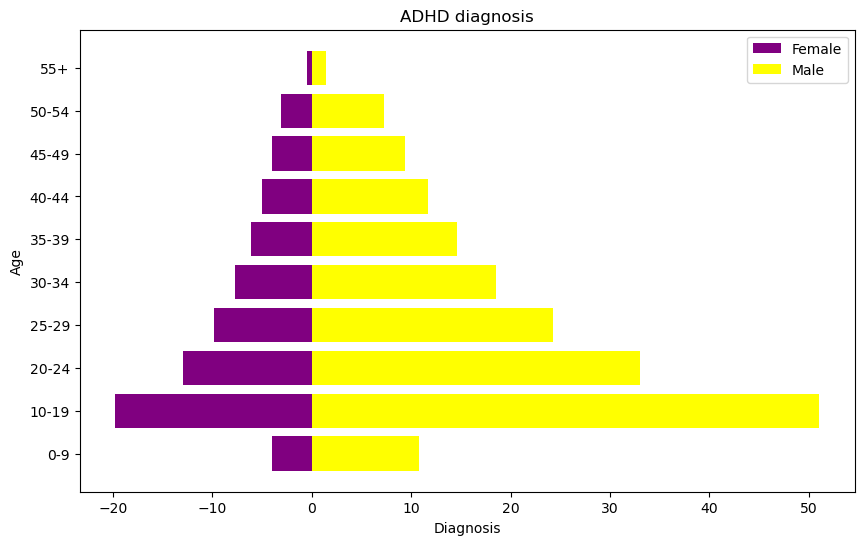

In [27]:
butt= plt.figure(figsize = (10, 6))

# plot reversed horizontal bar chart for females, to stay at the left side
plt.barh(fem_adhd_gl['age'], -fem_adhd_gl['val'], color = 'purple', label = 'Female')

# plot horizontal barchat for males
plt.barh(mal_adhd_gl['age'], mal_adhd_gl['val'], color = 'yellow', label = 'Male')

plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.title('ADHD diagnosis')

plt.savefig('/Users/anaantonello/Desktop/Jupter NoteBooks/Exported-Jupiter.adhd_gender.jpeg')
plt.legend()
plt.show()

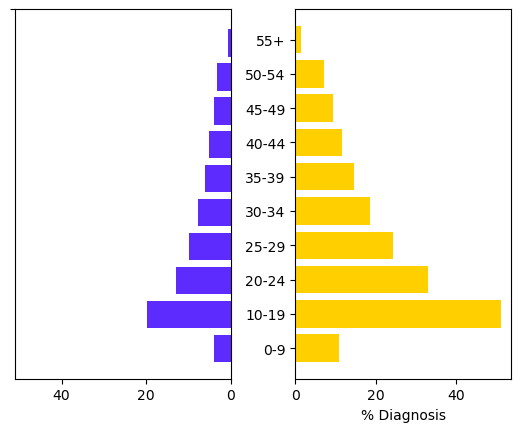

In [26]:
# num_ages = len(fem_adhd_gl['age'].unique())
# yposition = np.arange(num_ages) + 1 # bars centered on the y axis

fig, (ax_left, ax_right) = plt.subplots(ncols = 2)

# Left plot - females reversed horizontal bar chart,
ax_left.barh(fem_adhd_gl['age'], fem_adhd_gl['val'], align = 'center', color = '#5E2BFF', label = 'Female')
ax_left.set_yticks('')
# ax_left.set_xlabel('Diagnosis')
ax_left.invert_xaxis()

# Righr plot - males horizontal bar chart 
ax_right.barh(mal_adhd_gl['age'], mal_adhd_gl['val'], align = 'center', color = '#FFCF00', label = 'Male')
ax_right.set_xlabel('% Diagnosis')

# Set y axis on the left to be the same as on the right (that is higher)
ax_left.set_xlim(mal_adhd_gl['val'].max())

# Adjusting the space between left and right subplots
plt.subplots_adjust(wspace = 0.3)

plt.show()